A notebook to process experimental results of ex1_vary_n.py: Rejection rate as sample size $n$ increases.

In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import autograd.numpy as np

import kmod.plot as plot
import matplotlib
import matplotlib.pyplot as plt

import scipy.stats as stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
plot.set_default_matplotlib_options()

In [23]:
def load_plot_vs_ns(fname, show_legend=True, xscale='linear', yscale='linear'):
    """
    ns = sample sizes
    """
    func_xvalues = lambda agg_results: agg_results['ns']
    ex = 1
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    #plt.figure(figsize=(10,5))
    results = plot.plot_prob_reject(
        ex, fname, func_xvalues, '', func_title=func_title)
    
    plt.title('')
    
    if xscale is not None:
        plt.xscale(xscale)
    if yscale is not None:
        plt.yscale(yscale)
    
    plt.xlabel('Sample size $n$')
    plt.gca().legend(loc='best').set_visible(show_legend)
    if show_legend:
        plt.legend(bbox_to_anchor=(1.0, 1.05))
        
    plt.grid(False)
    return results


def load_runtime_vs_ns(fname, xlabel='Sample size $n$', 
                      show_legend=True, xscale='linear', yscale='linear'):
    func_xvalues = lambda agg_results: agg_results['ns']
    ex = 1
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    #plt.figure(figsize=(10,6))
    
    results = plot.plot_runtime(ex, fname,  
                                func_xvalues, xlabel=xlabel, func_title=func_title)
    
    plt.title('')
    plt.gca().legend(loc='best').set_visible(show_legend)
    if show_legend:
        plt.legend(bbox_to_anchor=(1.0, 1.05))
    
    #plt.grid(True)
    if xscale is not None:
        plt.xscale(xscale)
    if yscale is not None:
        plt.yscale(yscale)
    return results


----------

## 5D Gaussian problem. H0 is true

In [24]:
# gauss5d_h0_fname = 'ex1-stdnormal_h0_d5-me4_rs100_nmi100_nma500_a0.050.p'
# gauss5d_h0_results = load_plot_vs_ns(gauss5d_h0_fname, show_legend=True)
# plt.grid()
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1])
# plt.savefig(gauss5d_h0_fname.replace('.p', '.pdf', 1), bbox_inches='tight')

## 50D. H0 is true

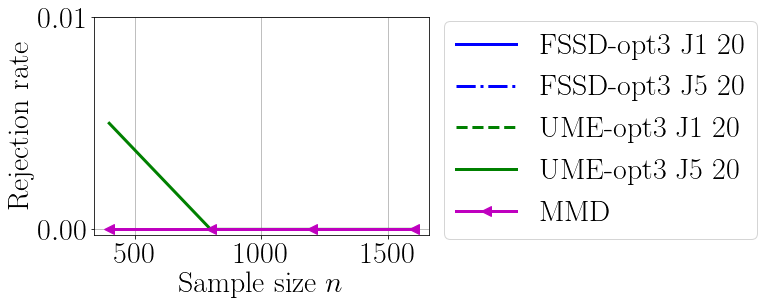

In [39]:
gauss50d_h0_fname = 'ex1-stdnorm_h0_d50-me5_rs200_nmi400_nma1600_a0.050.p'
gauss50d_h0_results = load_plot_vs_ns(gauss50d_h0_fname, show_legend=True)
plt.grid()
plt.yticks([0, 0.01])
plt.savefig(gauss50d_h0_fname.replace('.p', '.pdf', 1), bbox_inches='tight')

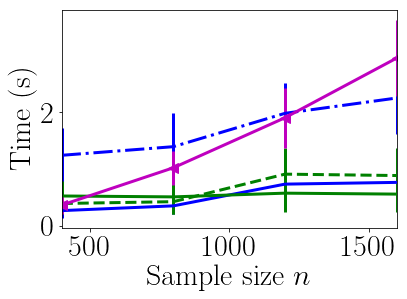

In [40]:
load_runtime_vs_ns(gauss50d_h0_fname, show_legend=False);
# plt.yticks([0, 100, 200, 300])
plt.savefig(gauss50d_h0_fname.replace('.p', '_time.pdf', 1), bbox_inches='tight',
           show_legend=False)

------------

## Blobs 2d

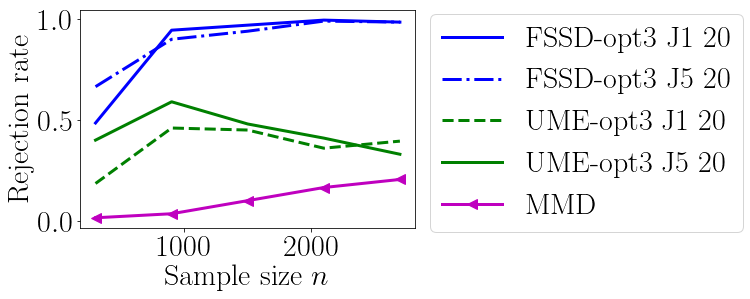

In [37]:
fname = 'ex1-gmm_blobs_d2-me5_rs200_nmi300_nma2700_a0.050.p'
load_plot_vs_ns(fname)
plt.savefig(fname.replace('.p', '.pdf', 1), bbox_inches='tight')

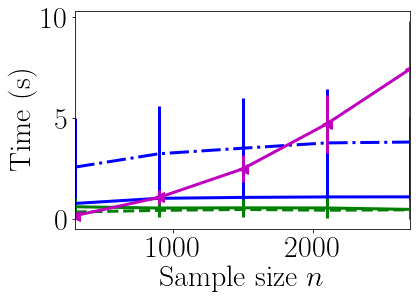

In [38]:
load_runtime_vs_ns(fname, show_legend=False);
# plt.yticks([0, 100, 200, 300])
plt.savefig(fname.replace('.p', '_time.pdf', 1), bbox_inches='tight',
           show_legend=False)

----------------


-----------

## 1D Gaussian mean shift problem

$p = \mathcal{N}(1, 1)$, $q = \mathcal{N}(0.5, 1)$, $r = \mathcal{N}(0, 1)$. So, $q$ is better than $p$ and the test should reject $H_0$.
    

In [29]:
# # Gaussian mean shift problem. 1D
# gauss1d_fname = 'ex1-stdnormal_shift_d1-me4_rs100_nmi100_nma500_a0.050.p'
# gauss1d_results = load_plot_vs_ns(gauss1d_fname, show_legend=True)
# plt.savefig(gauss1d_fname.replace('.p', '.pdf', 1), bbox_inches='tight')

In [30]:
# load_runtime_vs_ns(gauss1d_fname, show_legend=False);
# # plt.yticks([0, 100, 200, 300])
# plt.savefig(gauss1d_fname.replace('.p', '_time.pdf', 1), bbox_inches='tight',
#            show_legend=False)